## Fetching Dataset and preprocessing

In [1]:
import tensorflow as tf
from tensorflow import keras
from keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout

In [2]:
(X_train, y_train), (X_test, y_test)= mnist.load_data()
# print (X_train.shape, y_train.shape, X_test.shape, y_train.shape)

In [3]:
def plot_input_img(i):
    plt.imshow(X_train[i], cmap = 'binary')
    plt.title(y_train[i])

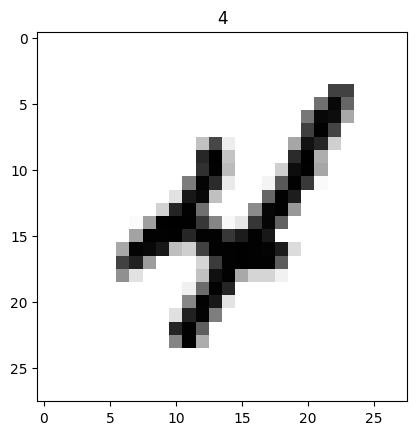

In [4]:
for i in range(10):
    plot_input_img(i)

In [5]:
# Preprocess the data

#Normalizing the image to [0,1] range
X_train = X_train.astype(np.float32)/255
X_test = X_test.astype(np.float32)/255

# Reshape / expand the dimensions of images to (28,28,1)
X_train = np.expand_dims(X_train, -1)
X_test = np.expand_dims(X_test, -1)

# convert classes to one hot vectors
y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)

## Build the Model

In [9]:
# Build the model
model = Sequential()

#input layer: first convolution layer
model.add(Conv2D(32,(3,3),input_shape =(28,28,1), activation='relu'))
model.add(MaxPool2D((2,2)))

# second convolution layer
model.add(Conv2D(64,(3,3), activation='relu'))
model.add(MaxPool2D((2,2)))

model.add(Flatten())

# preventing overfitting
model.add(Dropout(0.25))

#classification layer
model.add(Dense(10, activation="softmax"))

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dropout (Dropout)           (None, 1600)              0

In [11]:
model.compile(optimizer='adam', loss = keras.losses.categorical_crossentropy, metrics=['accuracy'])

In [21]:
# Callbacks

from keras.callbacks import EarlyStopping, ModelCheckpoint

# Earlystopping

es=EarlyStopping(monitor='val_acc', min_delta=0.01, patience=4, verbose=1)

# Model Check Point
checkpoint_filepath = '/Users/abdullahraashid/Documents/PythonML/DigitRecognition/savedmodel.h5'

mc = ModelCheckpoint(checkpoint_filepath, monitor = "val_acc", verbose = 1, save_best_only=True)

# callback
cb = [es,mc]

## Model Training

In [22]:
his = model.fit(X_train, y_train, epochs=50, validation_split = 0.4, callbacks=cb)

Epoch 1/50
1125/1125 [==============================] - 9s 8ms/step - loss: 0.0021 - accuracy: 0.9994 - val_loss: 0.0963 - val_accuracy: 0.9894
Epoch 2/50
1125/1125 [==============================] - 14s 12ms/step - loss: 0.0021 - accuracy: 0.9993 - val_loss: 0.1034 - val_accuracy: 0.9902
Epoch 3/50
1125/1125 [==============================] - 9s 8ms/step - loss: 0.0035 - accuracy: 0.9992 - val_loss: 0.1104 - val_accuracy: 0.9890
Epoch 4/50
1125/1125 [==============================] - 9s 8ms/step - loss: 0.0035 - accuracy: 0.9988 - val_loss: 0.1040 - val_accuracy: 0.9900
Epoch 5/50
1125/1125 [==============================] - 11s 10ms/step - loss: 0.0028 - accuracy: 0.9993 - val_loss: 0.0875 - val_accuracy: 0.9899
Epoch 6/50
1125/1125 [==============================] - 9s 8ms/step - loss: 0.0037 - accuracy: 0.9989 - val_loss: 0.0882 - val_accuracy: 0.9900
Epoch 7/50
1125/1125 [==============================] - 9s 8ms/step - loss: 0.0023 - accuracy: 0.9991 - val_loss: 0.0946 - val_accur

In [25]:
#save the model
model.save('savemodel.h5')
model_S = keras.models.load_model("/Users/abdullahraashid/Documents/PythonML/DigitRecognition/savemodel.h5")

## Evaluate the model

In [27]:
score = model_S.evaluate(X_test, y_test)

print(f"the model accuracy is {score[1]} ") # the model accuracy is 0.9908000230789185 and the loss is 0.0815 which is negligible

313/313 [==============================] - 1s 2ms/step - loss: 0.0815 - accuracy: 0.9908
the model accuracy is 0.9908000230789185 
